<hr/>

# Introduction to Data Science - Fall 2021
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Dependence and correlations
- Sampling from Gaussians 
- Useful Python modules

<hr/>

<h1><font color="darkblue">Bivariate and Multivariate</font></h1>

### Dependence
- Consider random variables $X$, $Y\in\mathbb{R}$

> We can look at them separately but ...
>
> Are they "related" at all?

- Dependent variables

> - discrete: $\displaystyle P(X=x, Y=y) \neq P(X=x)\,P(Y=y)$
>
> - continuous: $\displaystyle p(x, y) \neq p(x)\,p(y)$
> 
>More on this later...

### Covariance

- Definition 

>$\displaystyle \mathbb{Cov}[X,Y]=\mathbb{E}\Big[\big(X-\mathbb{E}[X]\big)\big(Y-\mathbb{E}[Y]\big)\Big]$  
>
> Other notations: $\mathrm{C}_{X,Y}$, $\sigma(X,Y)$, ...

- Sample covariance

>$\displaystyle C = \frac{1}{N\!-\!1}\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})$

- Pearson’s correlation coefficient (most common) 1:高线性相关 0：无线性相关

>$\displaystyle \rho_{X,Y} = \frac{\mathbb{Cov}(X,Y)}{\sigma_X\sigma_Y}$

### Quiz

Cov(X,Y) = E(XY)-E(X)E(Y)
if x y independent, E(XY) = E(X)E(Y) so cov will be 0

1) If $X$ and $Y$ are independent, are they also uncorrelated?

        [√] Yes      [ ] No
        
2) If $X$ and $Y$ are uncorrelated, are they also independent?

        [ ] Yes      [√] No

### More examples (0: symetric)

<img src="files/600px-Correlation_examples2.svg.png" width=500 align="left">



In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


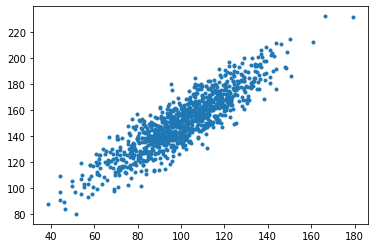

In [2]:
# seed random number generator
random.seed(1)
# prepare data
N = 1000
X =20 * random.randn(N) + 100
Y = X + (10 * random.randn(N) + 50)
plot(X,Y, '.')

In [3]:
# calculate covariance
cov = (np.sum((X - np.mean(X)) * (Y - np.mean(Y))) )/(N-1)
print('covariance: %.5f' %cov)
# calculate Pearson's correlation
varX = (np.sum((X - np.mean(X))**2))/(N-1)
varY = (np.sum((Y - np.mean(Y))**2))/(N-1)
corr = cov / (np.sqrt(varX) * np.sqrt(varY))
print('Pearsons correlation: %.5f' % corr)

covariance: 389.75456
Pearsons correlation: 0.88761


In [4]:
from scipy.stats import pearsonr

In [5]:
# calculate covariance matrix
covariance = np.cov(X, Y)
print('covariance: %.5f' % covariance[0,1])

# calculate Pearson's correlation
corr = np.corrcoef(X, Y)
print('Pearsons correlation: %.5f' % corr[0,1])

corr, _ = pearsonr(X, Y)
print('Pearsons correlation: %.5f' % corr)

covariance: 389.75456
Pearsons correlation: 0.88761
Pearsons correlation: 0.88761


### Vector Notation

- Let $\boldsymbol{V}$ represent the 2-vector of random scalar variables $X$ and $Y$

>$\boldsymbol{V} = \begin{pmatrix}X\\Y\end{pmatrix}$

- Mean

>$\displaystyle \mathbb{E}[\boldsymbol{V}] = \begin{pmatrix}\mathbb{E}[X]\\\mathbb{E}[Y]\end{pmatrix} = \begin{pmatrix}\mu_X\\\mu_Y\end{pmatrix}$

- Covariance matrix

>$\displaystyle \Sigma_{\boldsymbol{V}} = \mathbb{E}\Big[\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)^T\Big]$ $ = \left( \begin{array}{ccc}
\sigma_X^2 & \mathrm{C}_{X,Y}  \\
\mathrm{C}_{Y,X} & \sigma_Y^2  \end{array} \right)$
>
> Same generalization of variance works in any dimensions



### Bivariate Normal Distribution
- Independent and uncorrelated

>$ \displaystyle {\cal N}(x,y;\mu_x,\mu_y,\sigma_x,\sigma_y) = \frac{1}{2 \pi \sigma_x \sigma_y}\ \exp\left[-\frac{(x\!-\!\mu_x)^2}{2\sigma_x^2} -\frac{(y\!-\!\mu_y)^2}{2\sigma_y^2} \right] $

- In general, for 2-vector $\boldsymbol{x}$

>$ \displaystyle{\cal N}(\boldsymbol{x};\boldsymbol{\mu},\Sigma) = \frac{1}{2\pi \lvert \Sigma \rvert^{\frac{1}{2}} }\ \exp\left[-\frac{1}{2} (\boldsymbol{x}\!-\!\boldsymbol{\mu})^T \Sigma^{-1} (\boldsymbol{x}\!-\!\boldsymbol{\mu})\right]$
>
> where $\lvert \Sigma \rvert$ is the determinant - other notation $\det\Sigma$ or $\det\!\left(\Sigma\right)$

- Uncorrelated if

>$ \displaystyle \Sigma = \left( \begin{array}{ccc}
\sigma_X^2 & 0  \\
0 & \sigma_Y^2  \end{array} \right)$

### Multivariate Normal Distribution

- In $k$ dimensions - not bold but $k$-vectors


>$ \displaystyle{\cal N}(x;\mu,\Sigma) = \frac{1}{\sqrt{(2\pi)^{k} \lvert \Sigma \rvert} }\ \exp\left[-\frac{1}{2} (x\!-\!\mu)^T \Sigma^{-1} (x\!-\!\mu)\right]$

### Detour: Another way to Sample from Gaussians
- Uncorrelated ${\cal N}(0,I)$: Box-Muller transform 

> Using 2 uniform randoms between 0 and 1
>
>$ Z_1 = \sqrt{-2\ln U_1}\,\cos\big(2\pi U_2\big)$ 
>
>$ Z_2 = \sqrt{-2\ln U_1}\,\sin\big(2\pi U_2\big)$ 

- Tranform: scale, rotate, shift


In [6]:
from scipy.stats import norm as gaussian

(2,)


array([2.00108706, 5.03028406])

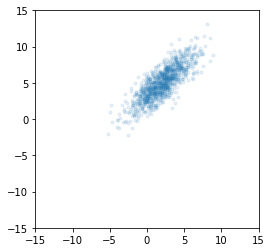

In [19]:
# generate many 2D (column) vectors
X = gaussian.rvs(0,1,(2,1000))
X[0,:] *= 3  # scale axis 0
f = +pi/4    # rotate by f
R = array([[cos(f),-sin(f)],
           [sin(f), cos(f)]]) 
V = R.dot(X)
V += np.array([[2],
               [5]]) # shift with a vector
# plot on square figure
figure(figsize=(4,4)); a=15; xlim(-a,a); ylim(-a,a)
plot(V[0,:],V[1,:], '.', alpha=0.1)

# sample covariance matrix
averages = mean(V, axis=1)
print (averages.shape)
averages

In [20]:
# avg = averages.reshape(averages.size,1)
avg = averages[:,np.newaxis] 
print ("Average: ")
print (avg)
print ("Cov:")
print (np.dot(V-avg, (V-avg).T) / (V[0,:].size-1)) # V.shape[1]
print (np.dot(R.dot(np.array([[3, 0],[0,1]])), R.dot(np.array([[3, 0],[0,1]])).T))

Average: 
[[2.00108706]
 [5.03028406]]
Cov:
[[5.03893932 4.12260543]
 [4.12260543 5.10101266]]
[[5. 4.]
 [4. 5.]]


## Pandas Data Structure

In [10]:
from IPython.display import display

In [11]:
m = np.random.randn(6,4)
print (m)

[[-0.14037099  0.14164167  0.31196861  0.76908518]
 [ 0.58428577  1.78859265 -0.02463104  1.4902898 ]
 [-0.32107715  0.56080603  0.27078568  0.76666871]
 [ 0.03334841  1.76057232 -2.03358571  0.86023614]
 [ 0.69816843  0.76821324  1.75179588  1.32607009]
 [-1.40490002  1.12513637 -0.44106926  0.22022418]]


In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(m)
# Check data type of the columns
display(df.dtypes)
display(df.index)
df

0    float64
1    float64
2    float64
3    float64
dtype: object

RangeIndex(start=0, stop=6, step=1)

,0,1,2,3
0,-0.140371,0.141642,0.311969,0.769085
1,0.584286,1.788593,-0.024631,1.490290
2,-0.321077,0.560806,0.270786,0.766669
3,0.033348,1.760572,-2.033586,0.860236
4,0.698168,0.768213,1.751796,1.326070
5,-1.404900,1.125136,-0.441069,0.220224


In [14]:
dates = pd.date_range('2012-12-29', periods=m.shape[0]);
dates

DatetimeIndex(['2012-12-29', '2012-12-30', '2012-12-31', '2013-01-01',
               '2013-01-02', '2013-01-03'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df = pd.DataFrame(m, index=dates, columns=list('ABCD'))
df.index.name = 'Dates'
df

,A,B,C,D
Dates,,,,
2012-12-29,-0.140371,0.141642,0.311969,0.769085
2012-12-30,0.584286,1.788593,-0.024631,1.490290
2012-12-31,-0.321077,0.560806,0.270786,0.766669
2013-01-01,0.033348,1.760572,-2.033586,0.860236
2013-01-02,0.698168,0.768213,1.751796,1.326070
2013-01-03,-1.404900,1.125136,-0.441069,0.220224


In [16]:
display(df)
display(df.head(3))

,A,B,C,D
Dates,,,,
2012-12-29,-0.140371,0.141642,0.311969,0.769085
2012-12-30,0.584286,1.788593,-0.024631,1.490290
2012-12-31,-0.321077,0.560806,0.270786,0.766669
2013-01-01,0.033348,1.760572,-2.033586,0.860236
2013-01-02,0.698168,0.768213,1.751796,1.326070
2013-01-03,-1.404900,1.125136,-0.441069,0.220224


,A,B,C,D
Dates,,,,
2012-12-29,-0.140371,0.141642,0.311969,0.769085
2012-12-30,0.584286,1.788593,-0.024631,1.490290
2012-12-31,-0.321077,0.560806,0.270786,0.766669


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2012-12-29 to 2013-01-03
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [18]:
df['A']

Dates
2012-12-29   -0.140371
2012-12-30    0.584286
2012-12-31   -0.321077
2013-01-01    0.033348
2013-01-02    0.698168
2013-01-03   -1.404900
Freq: D, Name: A, dtype: float64

In [19]:
df.A

Dates
2012-12-29   -0.140371
2012-12-30    0.584286
2012-12-31   -0.321077
2013-01-01    0.033348
2013-01-02    0.698168
2013-01-03   -1.404900
Freq: D, Name: A, dtype: float64

In [20]:
for k in df.columns:
    display (df[k])

Dates
2012-12-29   -0.140371
2012-12-30    0.584286
2012-12-31   -0.321077
2013-01-01    0.033348
2013-01-02    0.698168
2013-01-03   -1.404900
Freq: D, Name: A, dtype: float64

Dates
2012-12-29    0.141642
2012-12-30    1.788593
2012-12-31    0.560806
2013-01-01    1.760572
2013-01-02    0.768213
2013-01-03    1.125136
Freq: D, Name: B, dtype: float64

Dates
2012-12-29    0.311969
2012-12-30   -0.024631
2012-12-31    0.270786
2013-01-01   -2.033586
2013-01-02    1.751796
2013-01-03   -0.441069
Freq: D, Name: C, dtype: float64

Dates
2012-12-29    0.769085
2012-12-30    1.490290
2012-12-31    0.766669
2013-01-01    0.860236
2013-01-02    1.326070
2013-01-03    0.220224
Freq: D, Name: D, dtype: float64

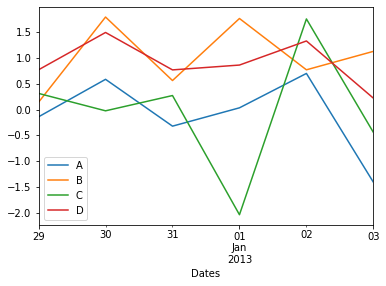

In [21]:
df.plot();

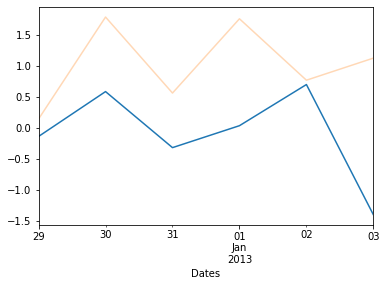

In [22]:
df.A.plot();
df['B'].plot(alpha=0.3);

In [23]:
df[:4]

,A,B,C,D
Dates,,,,
2012-12-29,-0.140371,0.141642,0.311969,0.769085
2012-12-30,0.584286,1.788593,-0.024631,1.490290
2012-12-31,-0.321077,0.560806,0.270786,0.766669
2013-01-01,0.033348,1.760572,-2.033586,0.860236


In [24]:
# label based selection
df.loc[['2012-12-29','2012-12-31','2013-01-02'],['A','B','C']]

,A,B,C
Dates,,,
2012-12-29,-0.140371,0.141642,0.311969
2012-12-31,-0.321077,0.560806,0.270786
2013-01-02,0.698168,0.768213,1.751796


In [25]:
# integer position based selection
df.iloc[::2,2::-1] # frist 2: step = 2  -1: reverse
# df.loc(....[CBA])

,C,B,A
Dates,,,
2012-12-29,0.311969,0.141642,-0.140371
2012-12-31,0.270786,0.560806,-0.321077
2013-01-02,1.751796,0.768213,0.698168


In [26]:
# Boolean indexing
df[df['A'] > 0.5]

,A,B,C,D
Dates,,,,
2012-12-30,0.584286,1.788593,-0.024631,1.49029
2013-01-02,0.698168,0.768213,1.751796,1.32607


In [27]:
# add a column
df['new'] = 5 * np.ones(len(df))
df

,A,B,C,D,new
Dates,,,,,
2012-12-29,-0.140371,0.141642,0.311969,0.769085,5.0
2012-12-30,0.584286,1.788593,-0.024631,1.490290,5.0
2012-12-31,-0.321077,0.560806,0.270786,0.766669,5.0
2013-01-01,0.033348,1.760572,-2.033586,0.860236,5.0
2013-01-02,0.698168,0.768213,1.751796,1.326070,5.0
2013-01-03,-1.404900,1.125136,-0.441069,0.220224,5.0


In [28]:
df['new'] = 5
df

,A,B,C,D,new
Dates,,,,,
2012-12-29,-0.140371,0.141642,0.311969,0.769085,5
2012-12-30,0.584286,1.788593,-0.024631,1.490290,5
2012-12-31,-0.321077,0.560806,0.270786,0.766669,5
2013-01-01,0.033348,1.760572,-2.033586,0.860236,5
2013-01-02,0.698168,0.768213,1.751796,1.326070,5
2013-01-03,-1.404900,1.125136,-0.441069,0.220224,5


In [29]:
df['new'] = df.A.map(lambda x: 5*x)
df

,A,B,C,D,new
Dates,,,,,
2012-12-29,-0.140371,0.141642,0.311969,0.769085,-0.701855
2012-12-30,0.584286,1.788593,-0.024631,1.490290,2.921429
2012-12-31,-0.321077,0.560806,0.270786,0.766669,-1.605386
2013-01-01,0.033348,1.760572,-2.033586,0.860236,0.166742
2013-01-02,0.698168,0.768213,1.751796,1.326070,3.490842
2013-01-03,-1.404900,1.125136,-0.441069,0.220224,-7.024500


In [30]:
# Modify new column
df['new'] = df['new'] + 1
df

,A,B,C,D,new
Dates,,,,,
2012-12-29,-0.140371,0.141642,0.311969,0.769085,0.298145
2012-12-30,0.584286,1.788593,-0.024631,1.490290,3.921429
2012-12-31,-0.321077,0.560806,0.270786,0.766669,-0.605386
2013-01-01,0.033348,1.760572,-2.033586,0.860236,1.166742
2013-01-02,0.698168,0.768213,1.751796,1.326070,4.490842
2013-01-03,-1.404900,1.125136,-0.441069,0.220224,-6.024500


In [31]:
# Delete columns
del df['new']
df

,A,B,C,D
Dates,,,,
2012-12-29,-0.140371,0.141642,0.311969,0.769085
2012-12-30,0.584286,1.788593,-0.024631,1.490290
2012-12-31,-0.321077,0.560806,0.270786,0.766669
2013-01-01,0.033348,1.760572,-2.033586,0.860236
2013-01-02,0.698168,0.768213,1.751796,1.326070
2013-01-03,-1.404900,1.125136,-0.441069,0.220224


In [32]:
df.values

array([[-0.14037099,  0.14164167,  0.31196861,  0.76908518],
       [ 0.58428577,  1.78859265, -0.02463104,  1.4902898 ],
       [-0.32107715,  0.56080603,  0.27078568,  0.76666871],
       [ 0.03334841,  1.76057232, -2.03358571,  0.86023614],
       [ 0.69816843,  0.76821324,  1.75179588,  1.32607009],
       [-1.40490002,  1.12513637, -0.44106926,  0.22022418]])

## Data in Files

- Comma Separated Value (CSV) 

In [33]:
# save the dataframe
df.to_csv('random.csv')

In [34]:
# load into new
ndf = pd.read_csv('random.csv', index_col='Dates')
ndf

,A,B,C,D
Dates,,,,
2012-12-29,-0.140371,0.141642,0.311969,0.769085
2012-12-30,0.584286,1.788593,-0.024631,1.490290
2012-12-31,-0.321077,0.560806,0.270786,0.766669
2013-01-01,0.033348,1.760572,-2.033586,0.860236
2013-01-02,0.698168,0.768213,1.751796,1.326070
2013-01-03,-1.404900,1.125136,-0.441069,0.220224


### Create a file in Excel


- Save it as a csv in Excel


,X,Y
0,0,0.000000
1,1,0.198669
2,2,0.389418
3,3,0.564642
4,4,0.717356
5,5,0.841471
6,6,0.932039
7,7,0.985450
8,8,0.999574
9,9,0.973848


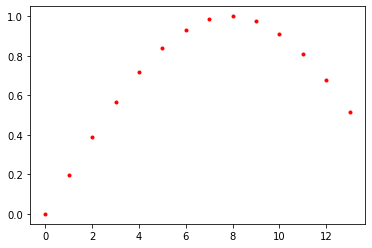

In [35]:
# load file and plot it
df = pd.read_csv('BookA.csv')
plt.plot(df.X.values, df.Y.values, '.r');
df

### Modules

- Computation

> [numpy](http://www.numpy.org/): arrays, vectorized functions, ...
><br/>
> [scipy](http://www.scipy.org/): stats, solvers, ...
><br/>
> [sklearn](http://scikit-learn.org/stable/index.html): machine learning, ...

- Data 

> [pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html): data structures, time series, ...

- Plotting

> [matplotlib](http://matplotlib.org/index.html): publication quality figures, animations, ...
><br/>
> [seaborn](http://seaborn.pydata.org/): statistical data visualization



In [37]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


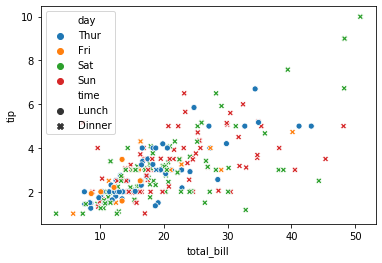

In [38]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time")

In [39]:
# least-squares fitting w/ scikit-learn
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit([[0],[1],[2]], [10,11,12]);
print (lr.predict([[0.5],[1.5]]))

[10.5 11.5]


In [16]:
def longestPalindrome( s: str) -> str:
        max_str1 = ""
        length1 = 0
        max_str2 = ""
        length2 = 0
        for i in range(len(s)):
            max_str, length = extend(s, i, i, len(s))
            max_str, length = extend(s, i, i+1, len(s))
        if length1 > length2:
            return max_str1
        else:
            return max_str2
        
def extend( s, i, j, n):
        llen = 0
        string = s[i]
        while i >=0 and j < n and s[i] == s[j]:
            print(s[i],s[j])
            llen +=1
            i -= 1
            j +=1
            string = s[i] + string + s[j]
            print(string)
        return string, llen

In [18]:
a = [((5, 4), 'South', 1), ((4, 5), 'West', 1)]


In [19]:
a[1]

((4, 5), 'West', 1)

In [20]:
a[0][0]

(5, 4)

In [21]:
a[1][1]

'West'

In [22]:
l = [1,2,3]

In [26]:
l.pop()
l.pop()

2

In [30]:
a = [((5, 4), 'South', 1), ((4, 5), 'West', 1)]
b = []
b.append(((4.5),[]))

In [31]:
b

[(4.5, [])]

In [32]:
for i,j,k in a:
    print(i)
    print(j)
    print(k)

(5, 4)
South
1
(4, 5)
West
1


In [34]:
for i in range(len(a)):
    print(a[i][0])
    print(a[i][1])

(5, 4)
South
(4, 5)
West


In [35]:
    def getpath(path):
        if path == 'South':
            return Directions.SOUTH
        elif path == 'North':
            return Directions.NORTH
        elif path == 'West':
            return Directions.WEST
        elif path == 'East':
            return Directions.EAST
        else:
            return None

    open = Stack()
    close = []
    S = problem.getStartState()
    open.push((S,[]))

    while open.isEmpty() == False:
        cnode,directions = open.pop()
        close.append(cnode)
        if problem.isGoalState(cnode):
            return directions
        if cnode not in close:
            s = problem.getSuccessors(cnode)
            for i in range(len(s)):
                node = s[i][0]
                direction = s[i][1]
                if node not in close:
                    open.push((node,directions.append(getpath(direction))))

    util.raiseNotDefined()

NameError: name 'Stack' is not defined

In [37]:
d = []
d = d + ['north']
d


['north']

In [48]:
b = []

In [52]:
a = ['a']
a.append(b.append('b'))

In [53]:
a

['a', None]

In [54]:
class Stack:
    "A container with a last-in-first-out (LIFO) queuing policy."
    def __init__(self):
        self.list = []

    def push(self,item):
        "Push 'item' onto the stack"
        self.list.append(item)

    def pop(self):
        "Pop the most recently pushed item from the stack"
        return self.list.pop()

    def isEmpty(self):
        "Returns true if the stack is empty"
        return len(self.list) == 0


In [55]:
i = Stack()

In [56]:
i